In [1]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

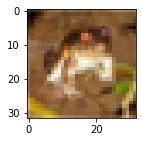

In [3]:
plt.figure(figsize = (15,2))
plt.imshow(X_train[0])
# plt.xlabel(classes)

In [4]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [5]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [9]:
X_train.shape

(50000, 32, 32, 3)

In [8]:
X_train = X_train/255
X_test = X_test/255
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

# method1: ANN

In [11]:
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000,activation='relu'),
    layers.Dense(10,activation='sigmoid'),
    
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 36s 10ms/step - loss: 1.8153 - accuracy: 0.3534
Epoch 2/5
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6224 - accuracy: 0.4289
Epoch 3/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.5430 - accuracy: 0.4555
Epoch 4/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4817 - accuracy: 0.4780
Epoch 5/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4316 - accuracy: 0.4961


In [12]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 1.5343 - accuracy: 0.4439


[1.534346580505371, 0.4438999891281128]

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
y_pred = ann.predict(X_test)

In [17]:
print(classification_report(y_test,np.argmax(y_pred,axis=1)))

              precision    recall  f1-score   support

           0       0.59      0.49      0.54      1000
           1       0.69      0.48      0.57      1000
           2       0.44      0.25      0.32      1000
           3       0.34      0.31      0.33      1000
           4       0.55      0.15      0.24      1000
           5       0.54      0.21      0.30      1000
           6       0.27      0.89      0.41      1000
           7       0.60      0.46      0.52      1000
           8       0.49      0.74      0.59      1000
           9       0.63      0.46      0.53      1000

    accuracy                           0.44     10000
   macro avg       0.51      0.44      0.43     10000
weighted avg       0.51      0.44      0.43     10000



# method2: CNN

In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,
                 kernel_size = (3,3),
                 activation='relu',
                 input_shape=(32,32,3)),
    
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64,
                 kernel_size = (3,3),
                 activation='relu'),
    
    layers.MaxPooling2D((2,2)),
    
#     ann part
    layers.Flatten(),
    layers.Dense(70,activation='relu'),
    layers.Dense(10,activation='softmax'),
    
])

In [23]:
cnn.compile(optimizer='adam',
           loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
           )

In [24]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 40s 8ms/step - loss: 1.4669 - accuracy: 0.4719
Epoch 2/5
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1147 - accuracy: 0.6082
Epoch 3/5
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9847 - accuracy: 0.6568
Epoch 4/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8915 - accuracy: 0.6926
Epoch 5/5
1563/1563 [==============================] - 13s 8ms/step - loss: 0.8208 - accuracy: 0.7156


In [25]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9224 - accuracy: 0.6813


[0.9224299788475037, 0.6812999844551086]